In [1]:
from midi_preprocessing import * # Make sure the functions here are updated
import pretty_midi
import os
import h5py

C:\Users\kriptos\miniconda3\envs\jupyter_env\lib\site-packages\pretty_midi\instrument.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


(3821, 2, 128, 16)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False Fals

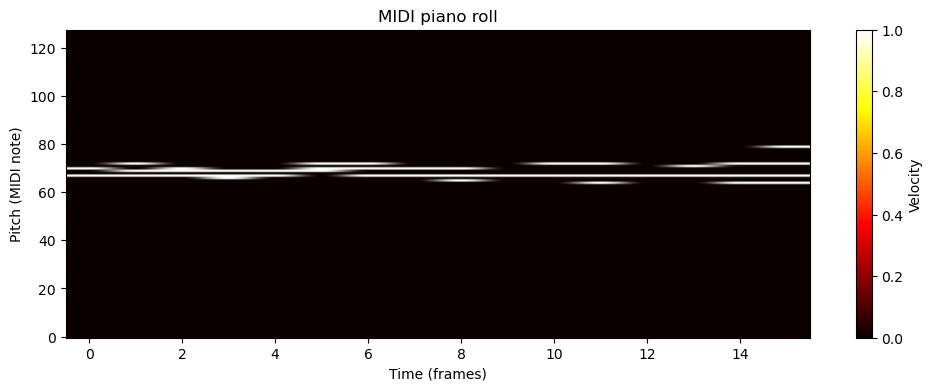

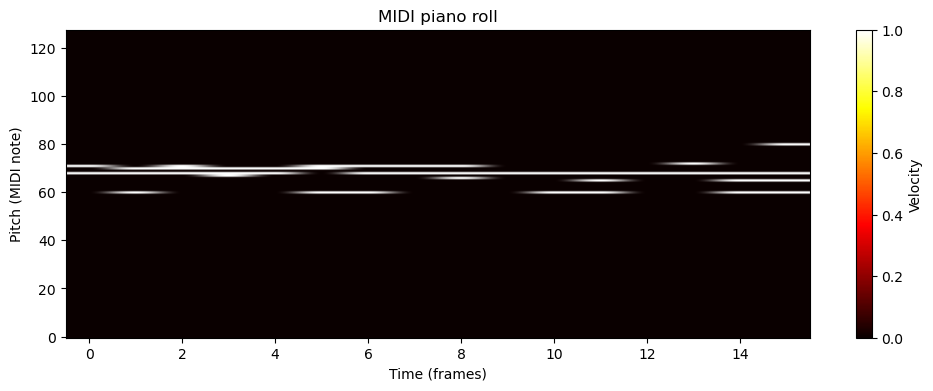

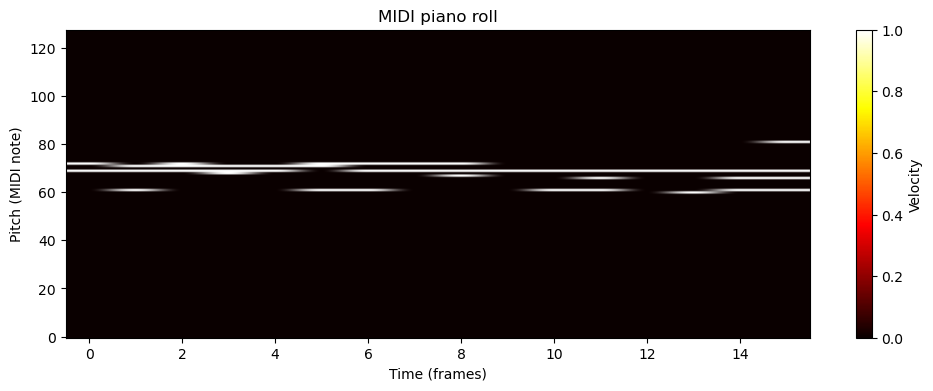

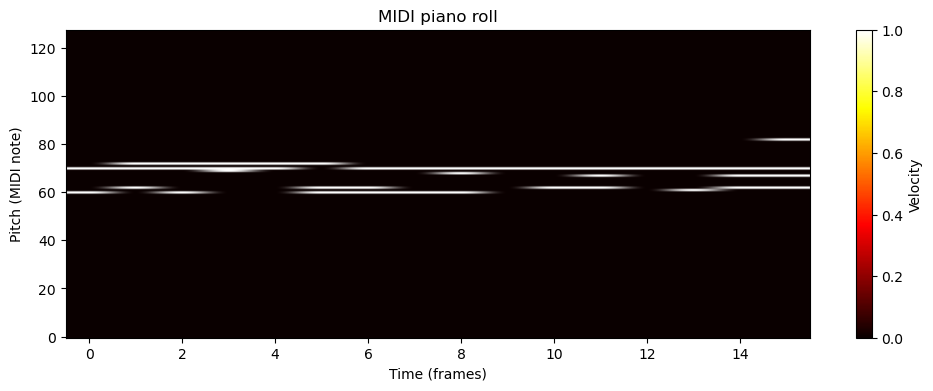

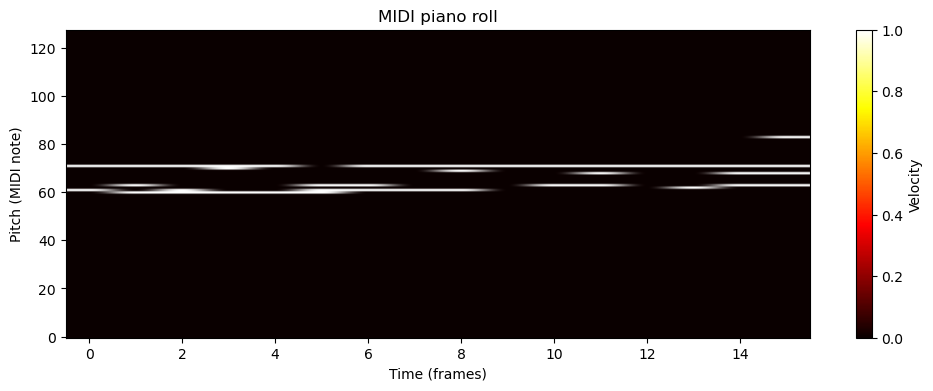

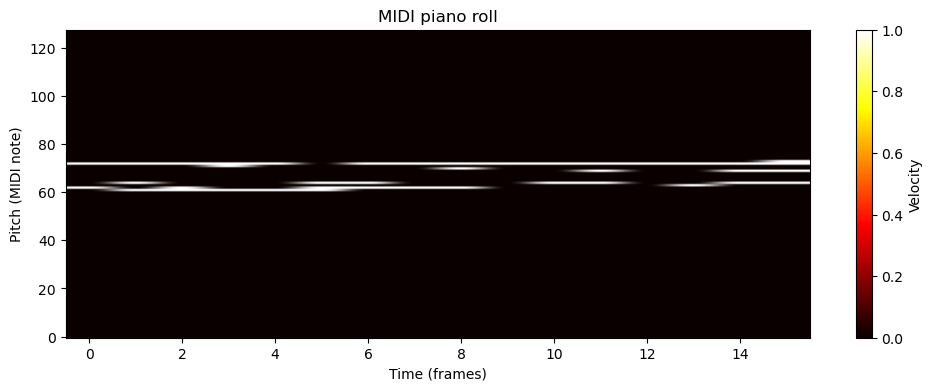

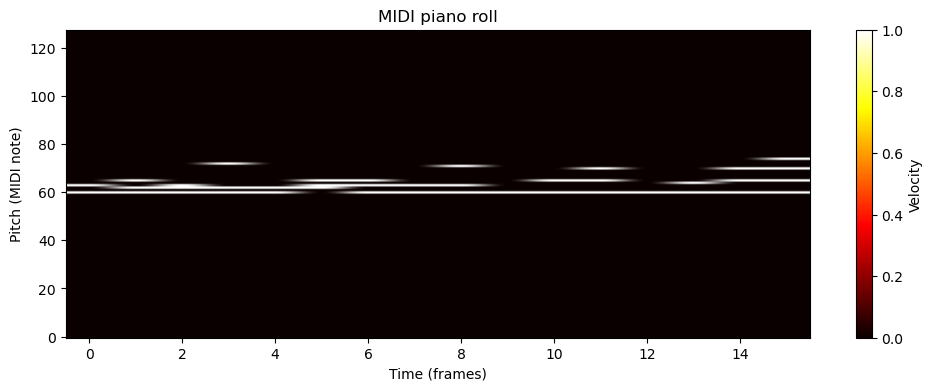

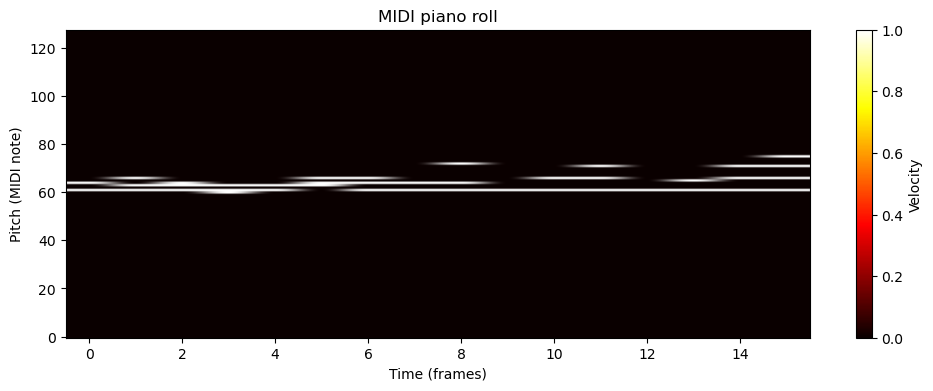

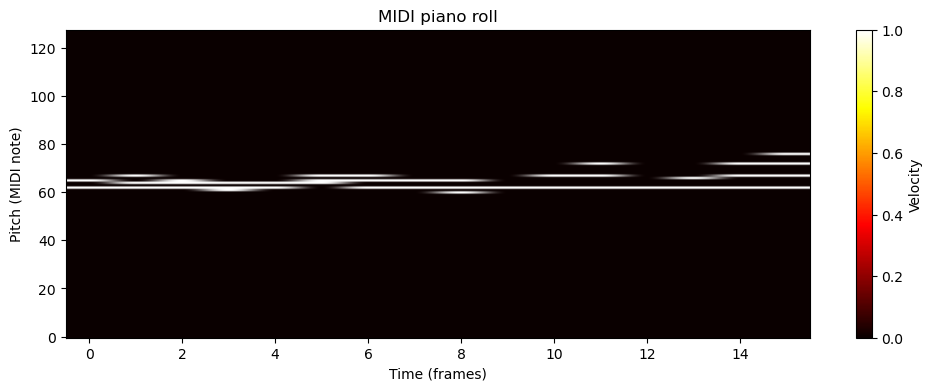

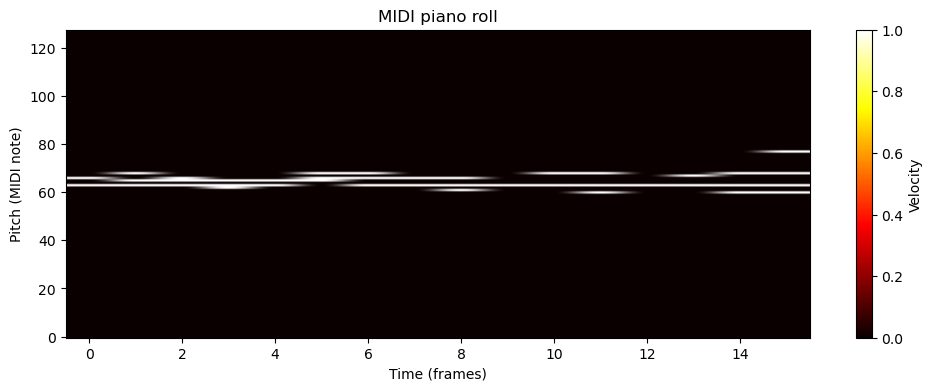

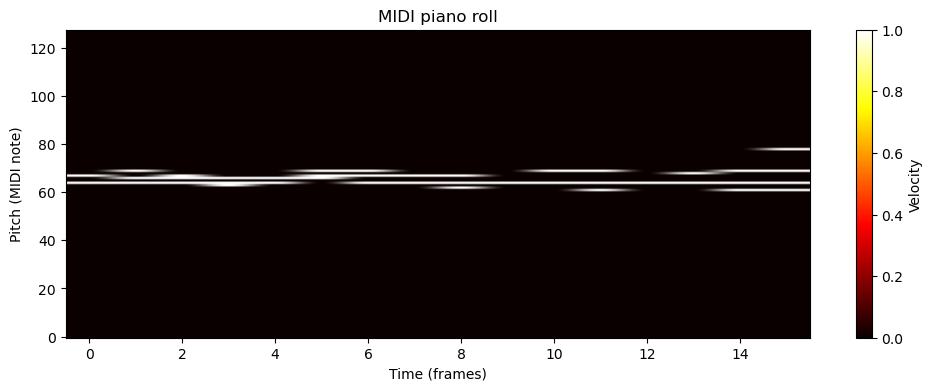

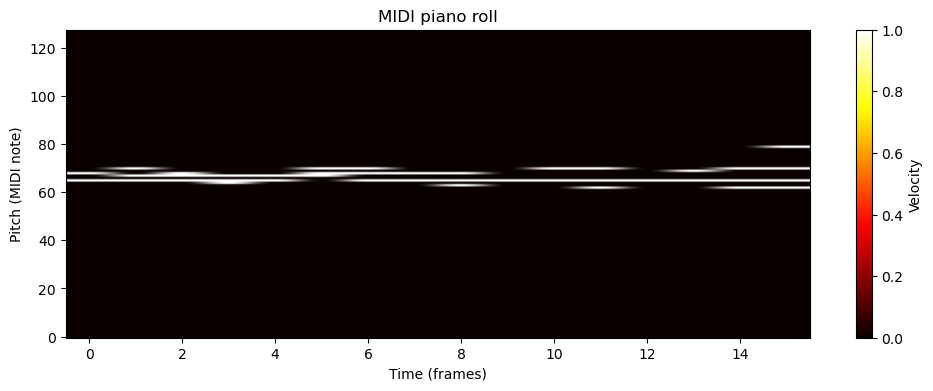

Element  10
Element  11
Element  12
Element  13
Element  14
Element  15
Element  16
Element  17
Element  18
Element  19
Element  20
Element  21
Element  22
Element  23
Element  24
Element  25
Element  26
Element  27
Element  28
Element  29
Element  30
Element  31
Element  32
Element  33
Element  34
Element  35
Element  36
Element  37
Element  38
Element  39
Element  40
Element  41
Element  42
Element  43
Element  44
Element  45
Element  46
Element  47
Element  48
Element  49
Element  50
Element  51
Element  52
Element  53
Element  54
Element  55
Element  56
Element  57
Element  58
Element  59
Element  60
Element  61
Element  62
Element  63
Element  64
Element  65
Element  66
Element  67
Element  68
Element  69
Element  70
Element  71
Element  72
Element  73
Element  74
Element  75
Element  76
Element  77
Element  78
Element  79
Element  80
Element  81
Element  82
Element  83
Element  84
Element  85
Element  86
Element  87
Element  88
Element  89
Element  90
Element  91
Element  92
Elem

In [5]:

h5_path = "./preprocessed/maestro-v3.0.0/dataset2/dataset.h5"
# Define the output directory path.
OUT_DIR_PATH = "./preprocessed/maestro-v3.0.0/dataset2/"
# Define output file name.
OUT_FILE_NAME = "dataset_2.h5"
# Define the EMPTY note in a bar
EMPTY = np.zeros(16)


def check_octave(bar):
    """
        This function is used to check whether a bar has one shifted note
        out of the admissible range for both the 2 octaves considered
        Args: 
            -bar:  np.array
    """
    # If the exceeded note of the first octave is not empty we fix its position
    if not(np.array_equal(bar[73, :], EMPTY)):
        bar[60,:] = bar[73, :]
        bar[73,:] = EMPTY
    
    # If the exceeded note of the second octave is not empty we fix its position
    if not(np.array_equal(bar[84, :],EMPTY)):
        bar[73,:] = bar[84, :]
        bar[84,:] = EMPTY


def shift_roll_up(sample, n):
    """
        This function can be used to circularly shift by n semitones the 2 bars
        checking for their integrity after the shift
        Args:
            -sample: (np.array, np.array)
            -n:      int
    """
    # Getting the 2 bar contained in a sample (previous and current)
    prev, curr = sample

    # Iterating through all values in the shift range
    for i in range(n):
        # Adding one fake note at the beginning of the roll
        prev = np.vstack((EMPTY,prev))
        # Copying last note in the first one
        prev[0,:] = prev[128,:]
        # Deleting the last note (we have an excess of notes by one)
        prev = np.delete(prev, 128, 0)
        
        # Adding one fake note at the beginning of the roll
        curr = np.vstack((EMPTY,curr))
        # Copying last note in the first one
        curr[0,:] = curr[128,:]
        # Deleting the last note (we have an excess of notes by one)
        curr = np.delete(curr, 128, 0)
        
        # Check on prev and curr for both the last note of the 2 considered octaves
        check_octave(prev)
        check_octave(curr)
    prev = prev.astype(bool)
    curr = curr.astype(bool)
    return prev,curr


# Reading the dataset of samples of pairs
dataset = None
with h5py.File(h5_path, 'r') as db:
    dataset = np.array(db['x'])
print (dataset.shape)

samples = []

# Creating the shifted version of the read dataset
for i in range(len(dataset)):
    sample = dataset[i, :, :, :]
    # Applying the shift for each of the twelve note in a octave
    for j in range(12):
        pair = shift_roll_up(sample, j)
        #if i == 10:
            #pair_slice = (slice(50,90), slice(None, None))
            #midi = piano_roll_to_pretty_midi(pair[0].astype(int) * 50, 8)
            #midi.write("piano_shifted_" + str(j) + ".midi")
            #show_piano_roll(pair[0])
        samples.append(pair)
    print("Element ", i)

# Saving the file in a new dataset
samples = np.stack(samples)
with h5py.File(OUT_DIR_PATH + OUT_FILE_NAME, "w") as f:
    f.create_dataset("x", data=samples, compression="gzip")


In [3]:

h5_path = "./preprocessed/maestro-v3.0.0/dataset2/dataset_2.h5"
with h5py.File(h5_path, 'r') as db:
    dataset = np.array(db['x'])
print (dataset.shape)

(45852, 2, 128, 16)


(128, 16)


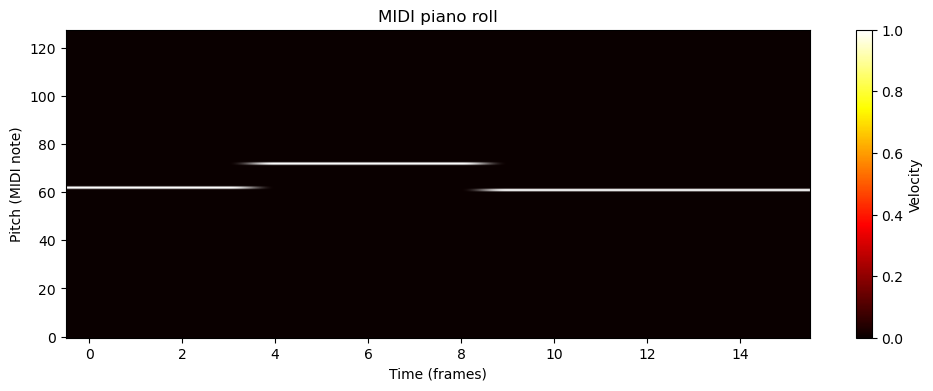

In [4]:
prev, curr = dataset[37000]
print(prev.shape)
show_piano_roll(prev)